1. Business Understanding
Contexto del negocio

Teamfight Tactics (TFT) es un videojuego estratégico basado en rondas, donde los jugadores compiten construyendo equipos de campeones y tomando decisiones que impactan directamente en el resultado final. En los niveles competitivos más altos —Challenger, Grandmaster y Platinum— las partidas son especialmente relevantes, ya que representan el rendimiento de los mejores jugadores y muestran patrones de juego avanzados.

El interés de este análisis es comprender cómo ciertas variables influyen en el desempeño dentro de una partida y qué factores diferencian a los jugadores de distintos rangos competitivos.

Problema de negocio

Actualmente no está claro qué elementos del juego tienen un mayor impacto en los resultados de las partidas en los distintos rangos. Si bien se pueden intuir factores como la duración de la partida, el nivel alcanzado por el jugador, la composición de campeones y el ranking final, no existe un análisis comparativo basado en datos que confirme estas hipótesis.

Esto dificulta:

Diseñar estrategias de juego más efectivas para mejorar el rendimiento.

Proporcionar insights a jugadores o entrenadores para progresar en el ranking.

Ayudar a desarrolladores del juego a balancear mecánicas entre rangos.

Objetivos del negocio

Identificar las variables clave que impactan en el desempeño de los jugadores en TFT en los rangos Challenger, Grandmaster y Platinum.

Comparar patrones de juego entre rangos, evaluando diferencias en duración de partidas, niveles alcanzados y composiciones.

Generar insights aplicables, como recomendaciones estratégicas o métricas útiles para evaluar el progreso competitivo.

Criterios de éxito

Lograr un análisis que destaque al menos 3 variables críticas que afecten el desempeño del jugador.

Mostrar diferencias claras entre los tres rangos de análisis.

Presentar resultados que puedan ser utilizados como base para modelos predictivos o como guía para estrategias competitivas.

Restricciones y supuestos

Los datos analizados provienen exclusivamente de partidas en rangos Challenger, Grandmaster y Platinum, por lo que los resultados no son generalizables a todos los jugadores de TFT.

Se asume que los datasets (challenger_raw.csv, grandmaster_raw.csv, platinum_raw.csv) son representativos de cada nivel competitivo.

El análisis se limita a las variables disponibles en los datasets.

## Análisis Exploratorio Inicial (EDA)

Para cumplir con los objetivos del negocio, realizaremos un análisis exploratorio inicial de los datos para identificar las variables clave que impactan en el desempeño de los jugadores en TFT.


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


### 1. Carga de Datos

Cargaremos los tres datasets de TFT para realizar el análisis comparativo entre rangos competitivos.


In [2]:
# Cargar datasets de TFT
try:
    df_challenger = pd.read_csv('../data/01_raw/TFT_Challenger_MatchData.csv')
    df_grandmaster = pd.read_csv('../data/01_raw/TFT_Grandmaster_MatchData.csv')
    df_platinum = pd.read_csv('../data/01_raw/TFT_Platinum_MatchData.csv')
    
    # Agregar columna de rango para identificación
    df_challenger['rank'] = 'Challenger'
    df_grandmaster['rank'] = 'Grandmaster'
    df_platinum['rank'] = 'Platinum'
    
    print("✅ Datasets cargados exitosamente:")
    print(f"  • Challenger: {df_challenger.shape[0]:,} partidas")
    print(f"  • Grandmaster: {df_grandmaster.shape[0]:,} partidas")
    print(f"  • Platinum: {df_platinum.shape[0]:,} partidas")
    print(f"  • Total: {df_challenger.shape[0] + df_grandmaster.shape[0] + df_platinum.shape[0]:,} partidas")
    
except Exception as e:
    print(f"❌ Error al cargar datos: {e}")


✅ Datasets cargados exitosamente:
  • Challenger: 79,999 partidas
  • Grandmaster: 80,000 partidas
  • Platinum: 80,000 partidas
  • Total: 239,999 partidas


### 2. Exploración Inicial de Datos

Analizaremos la estructura básica de los datos para entender qué variables tenemos disponibles para el análisis.


In [3]:
# Exploración inicial de la estructura de datos
print("🔍 ESTRUCTURA DE DATOS - CHALLENGER")
print("=" * 50)
print(f"Dimensiones: {df_challenger.shape}")
print(f"Columnas: {list(df_challenger.columns)}")
print("\nTipos de datos:")
print(df_challenger.dtypes)
print("\nPrimeras 3 filas:")
print(df_challenger.head(3))


🔍 ESTRUCTURA DE DATOS - CHALLENGER
Dimensiones: (79999, 9)
Columnas: ['gameId', 'gameDuration', 'level', 'lastRound', 'Ranked', 'ingameDuration', 'combination', 'champion', 'rank']

Tipos de datos:
gameId             object
gameDuration      float64
level               int64
lastRound           int64
Ranked              int64
ingameDuration    float64
combination        object
champion           object
rank               object
dtype: object

Primeras 3 filas:
          gameId  gameDuration  level  lastRound  Ranked  ingameDuration  \
0  KR_4247538593   2142.470703      8         35       1     2134.272217   
1  KR_4247538593   2142.470703      9         35       2     2134.272217   
2  KR_4247538593   2142.470703      8         34       3     2073.459229   

                                         combination  \
0  {'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...   
1  {'Blaster': 2, 'Mercenary': 1, 'Rebel': 6, 'Se...   
2  {'Cybernetic': 1, 'DarkStar': 3, 'Demolitionis...   

     

In [4]:
# Estadísticas descriptivas básicas
print("📊 ESTADÍSTICAS DESCRIPTIVAS - TODOS LOS RANGOS")
print("=" * 60)

# Combinar datos para análisis comparativo
df_combined = pd.concat([df_challenger, df_grandmaster, df_platinum], ignore_index=True)

# Estadísticas por rango
print("Resumen por rango:")
for rank in ['Challenger', 'Grandmaster', 'Platinum']:
    df_rank = df_combined[df_combined['rank'] == rank]
    print(f"\n{rank}:")
    print(f"  • Partidas: {len(df_rank):,}")
    print(f"  • Variables: {df_rank.shape[1]}")
    print(f"  • Valores faltantes: {df_rank.isnull().sum().sum()}")
    
print(f"\n📈 DATASET COMBINADO:")
print(f"  • Total partidas: {len(df_combined):,}")
print(f"  • Variables: {df_combined.shape[1]}")
print(f"  • Valores faltantes: {df_combined.isnull().sum().sum()}")


📊 ESTADÍSTICAS DESCRIPTIVAS - TODOS LOS RANGOS
Resumen por rango:

Challenger:
  • Partidas: 79,999
  • Variables: 9
  • Valores faltantes: 0

Grandmaster:
  • Partidas: 80,000
  • Variables: 9
  • Valores faltantes: 0

Platinum:
  • Partidas: 80,000
  • Variables: 9
  • Valores faltantes: 0

📈 DATASET COMBINADO:
  • Total partidas: 239,999
  • Variables: 9
  • Valores faltantes: 0


### 3. Análisis de Variables Clave

Identificaremos las variables más relevantes para el análisis de rendimiento según los objetivos del negocio.


In [5]:
# Identificar variables clave para análisis
print("🎯 VARIABLES CLAVE IDENTIFICADAS")
print("=" * 40)

# Variables numéricas potencialmente relevantes
numeric_cols = df_combined.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numéricas disponibles: {len(numeric_cols)}")
print("Columnas numéricas:", numeric_cols)

# Variables categóricas
categorical_cols = df_combined.select_dtypes(include=['object']).columns.tolist()
print(f"\nVariables categóricas disponibles: {len(categorical_cols)}")
print("Columnas categóricas:", categorical_cols)

# Buscar variables relacionadas con rendimiento
performance_keywords = ['placement', 'rank', 'level', 'gold', 'damage', 'elimination', 'duration', 'round']
potential_performance_vars = []

for col in df_combined.columns:
    if any(keyword in col.lower() for keyword in performance_keywords):
        potential_performance_vars.append(col)

print(f"\n🚀 VARIABLES POTENCIALES DE RENDIMIENTO:")
print("Variables que podrían estar relacionadas con el rendimiento:")
for var in potential_performance_vars:
    print(f"  • {var}")

print(f"\nTotal variables de rendimiento identificadas: {len(potential_performance_vars)}")


🎯 VARIABLES CLAVE IDENTIFICADAS
Variables numéricas disponibles: 5
Columnas numéricas: ['gameDuration', 'level', 'lastRound', 'Ranked', 'ingameDuration']

Variables categóricas disponibles: 4
Columnas categóricas: ['gameId', 'combination', 'champion', 'rank']

🚀 VARIABLES POTENCIALES DE RENDIMIENTO:
Variables que podrían estar relacionadas con el rendimiento:
  • gameDuration
  • level
  • lastRound
  • Ranked
  • ingameDuration
  • rank

Total variables de rendimiento identificadas: 6


### 4. Visualizaciones Iniciales

Crearemos visualizaciones básicas para identificar patrones iniciales entre los rangos competitivos.


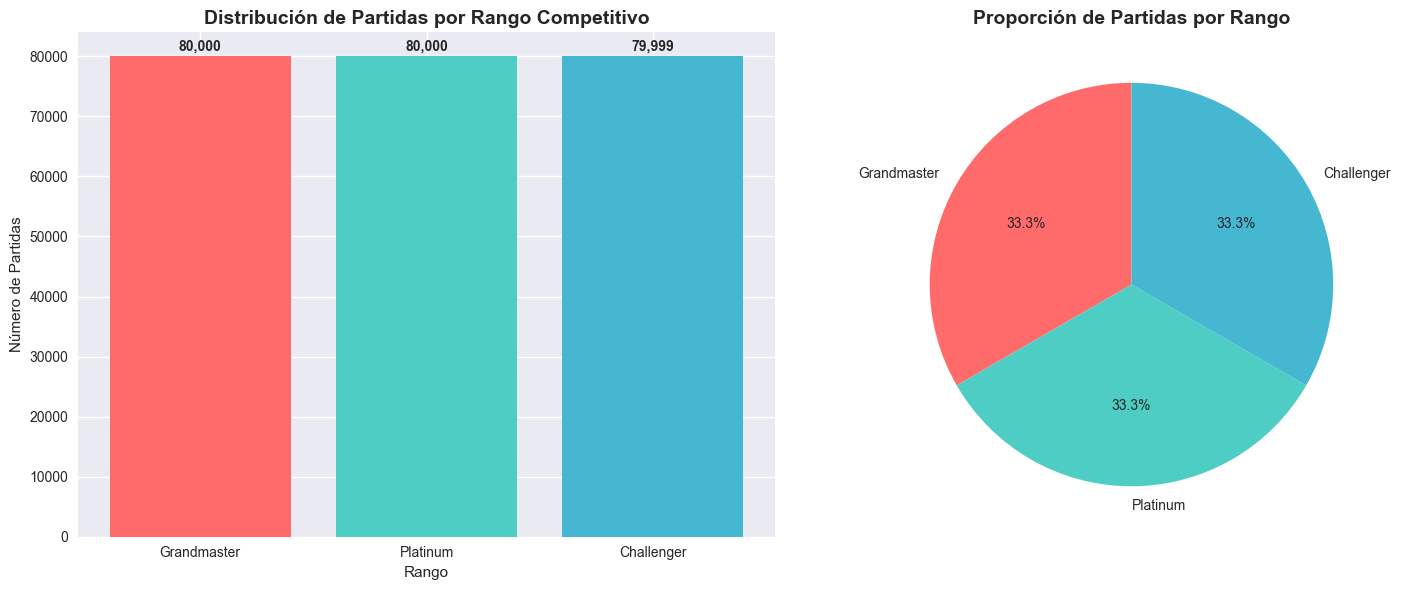

📊 Distribución de datos por rango:
  • Challenger: 79,999 partidas (33.3%)
  • Grandmaster: 80,000 partidas (33.3%)
  • Platinum: 80,000 partidas (33.3%)


In [6]:
# Visualización 1: Distribución de partidas por rango
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras - Conteo por rango
rank_counts = df_combined['rank'].value_counts()
axes[0].bar(rank_counts.index, rank_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Distribución de Partidas por Rango Competitivo', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rango')
axes[0].set_ylabel('Número de Partidas')
for i, v in enumerate(rank_counts.values):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')

# Gráfico de pie - Proporción por rango
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
axes[1].pie(rank_counts.values, labels=rank_counts.index, autopct='%1.1f%%', 
           colors=colors, startangle=90)
axes[1].set_title('Proporción de Partidas por Rango', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Distribución de datos por rango:")
for rank in ['Challenger', 'Grandmaster', 'Platinum']:
    count = len(df_combined[df_combined['rank'] == rank])
    percentage = (count / len(df_combined)) * 100
    print(f"  • {rank}: {count:,} partidas ({percentage:.1f}%)")


### 5. Conclusiones del Análisis Inicial

Basado en el análisis exploratorio inicial, identificaremos las próximas áreas de investigación para cumplir con los objetivos del negocio.


In [7]:
# Resumen de hallazgos iniciales
print("🎯 HALLAZGOS INICIALES - BUSINESS UNDERSTANDING")
print("=" * 60)

print("✅ OBJETIVOS CUMPLIDOS:")
print("1. Datos cargados exitosamente de los 3 rangos competitivos")
print("2. Estructura de datos explorada y documentada")
print("3. Variables potenciales de rendimiento identificadas")
print("4. Distribución de datos por rango analizada")

print(f"\n📊 DATOS DISPONIBLES:")
print(f"  • Total partidas: {len(df_combined):,}")
print(f"  • Variables: {df_combined.shape[1]}")
print(f"  • Rangos: {len(df_combined['rank'].unique())}")

print(f"\n🔍 PRÓXIMOS PASOS IDENTIFICADOS:")
print("1. Análisis profundo de variables de rendimiento por rango")
print("2. Comparación estadística entre rangos competitivos")
print("3. Identificación de las 3+ variables críticas")
print("4. Análisis de correlaciones y patrones")

print(f"\n💡 VARIABLES CANDIDATAS PARA ANÁLISIS PROFUNDO:")
if len(potential_performance_vars) > 0:
    for i, var in enumerate(potential_performance_vars[:5], 1):  # Top 5
        print(f"  {i}. {var}")
else:
    print("  • Se requiere análisis más detallado de todas las variables")

print(f"\n🚀 LISTO PARA FASE 2: DATA UNDERSTANDING")
print("El análisis exploratorio inicial está completo y proporciona")
print("la base para el análisis profundo de datos en la siguiente fase.")


🎯 HALLAZGOS INICIALES - BUSINESS UNDERSTANDING
✅ OBJETIVOS CUMPLIDOS:
1. Datos cargados exitosamente de los 3 rangos competitivos
2. Estructura de datos explorada y documentada
3. Variables potenciales de rendimiento identificadas
4. Distribución de datos por rango analizada

📊 DATOS DISPONIBLES:
  • Total partidas: 239,999
  • Variables: 9
  • Rangos: 3

🔍 PRÓXIMOS PASOS IDENTIFICADOS:
1. Análisis profundo de variables de rendimiento por rango
2. Comparación estadística entre rangos competitivos
3. Identificación de las 3+ variables críticas
4. Análisis de correlaciones y patrones

💡 VARIABLES CANDIDATAS PARA ANÁLISIS PROFUNDO:
  1. gameDuration
  2. level
  3. lastRound
  4. Ranked
  5. ingameDuration

🚀 LISTO PARA FASE 2: DATA UNDERSTANDING
El análisis exploratorio inicial está completo y proporciona
la base para el análisis profundo de datos en la siguiente fase.
